In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import lux
%matplotlib inline

import warnings


warnings.filterwarnings('ignore')

In [36]:
hepa_data = pd.read_csv("sum.csv")
hepa_data.head()

,Orden,Prueba,Resultado Lab.,Sexo,Edad
0,11121001,BILT,0.44,F,63
1,11121001,AST,21.00,F,63
2,11121001,ALT,25.00,F,63
3,11121001,ALP,104.00,F,63
4,11121001,GGT,40.00,F,63


In [37]:
hepa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           2981 non-null   int64  
 1   Prueba          2981 non-null   object 
 2   Resultado Lab.  2968 non-null   float64
 3   Sexo            2971 non-null   object 
 4   Edad            2981 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 116.6+ KB


In [38]:
delete_this = [21221149,
               31221128,
               31221231,
               61221498,
               81221488,
               91221268,
               100122022,
               100122097,
               100122356,
               101221028,
               101221099,
               101221366,
               101221422,
               131221190,
               131221370,
               131221388,
               131221431,
               141221021,
               141221033,
               141221048,
               141221216,
               161221148,
               161221265,
               161221325,
               161221329,
               161221374,
               171221157,
               171221183,
               171221372,
               181121260,
               201221121,
               201221161,
               201221202,
               211221031,
               211221289,
               211221342,
               221221010,
               231221195,
               231221352,
               241121102,
               241121388,
               241221163]

In [39]:
hepa_nov = pd.read_csv("nov.csv")
hepa_nov.head()

,Orden,Prueba,Resultado Lab.,Sexo,Edad,Edad en Dias
0,11121001,BILT,0.44,F,63,23011
1,11121001,AST,21.00,F,63,23011
2,11121001,ALT,25.00,F,63,23011
3,11121001,ALP,104.00,F,63,23011
4,11121001,GGT,40.00,F,63,23011


In [40]:
hepa_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           839 non-null    int64  
 1   Prueba          839 non-null    object 
 2   Resultado Lab.  839 non-null    float64
 3   Sexo            834 non-null    object 
 4   Edad            839 non-null    int64  
 5   Edad en Dias    839 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 39.5+ KB


In [41]:
hepa_nov.shape

(839, 6)

In [42]:
hepa_nov.describe()

,Orden,Resultado Lab.,Edad,Edad en Dias
count,8.390000e+02,839.000000,839.000000,839.000000
mean,1.367389e+08,61.022920,43.358760,15836.654350
std,8.238194e+07,252.442907,20.716492,7566.647121
min,1.112100e+07,0.230000,3.000000,1096.000000
25%,8.112114e+07,13.000000,28.000000,10227.000000
50%,1.312211e+08,23.000000,46.000000,16801.000000
75%,2.012211e+08,55.000000,60.000000,21915.000000
max,3.011214e+08,4942.000000,88.000000,32141.000000


In [43]:
nov5 = hepa_nov.drop(hepa_nov[hepa_nov.Orden.isin(delete_this)].index.tolist())
nov5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           690 non-null    int64  
 1   Prueba          690 non-null    object 
 2   Resultado Lab.  690 non-null    float64
 3   Sexo            685 non-null    object 
 4   Edad            690 non-null    int64  
 5   Edad en Dias    690 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 37.7+ KB


In [44]:
nov5.isnull().sum()

Orden             0
Prueba            0
Resultado Lab.    0
Sexo              5
Edad              0
Edad en Dias      0
dtype: int64

In [45]:
mulls = nov5.drop(nov5[nov5.Sexo.isnull()].index.tolist())
mulls.isnull().sum()

Orden             0
Prueba            0
Resultado Lab.    0
Sexo              0
Edad              0
Edad en Dias      0
dtype: int64

In [46]:
mulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           685 non-null    int64  
 1   Prueba          685 non-null    object 
 2   Resultado Lab.  685 non-null    float64
 3   Sexo            685 non-null    object 
 4   Edad            685 non-null    int64  
 5   Edad en Dias    685 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 37.5+ KB


In [47]:
menores = mulls[mulls['Edad'] <= 17]
menores.nunique().head()

Orden             22
Prueba             5
Resultado Lab.    84
Sexo               2
Edad              10
dtype: int64

In [48]:
menores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 10 to 838
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           110 non-null    int64  
 1   Prueba          110 non-null    object 
 2   Resultado Lab.  110 non-null    float64
 3   Sexo            110 non-null    object 
 4   Edad            110 non-null    int64  
 5   Edad en Dias    110 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.0+ KB


In [49]:
menores.head()

,Orden,Prueba,Resultado Lab.,Sexo,Edad,Edad en Dias
10,11121365,BILT,0.6,M,17,6209
11,11121365,AST,23.0,M,17,6209
12,11121365,ALT,15.0,M,17,6209
13,11121365,ALP,189.0,M,17,6209
14,11121365,GGT,15.0,M,17,6209


# Quitar menores equivale a 110 pruebas de 22 personas.

In [50]:
nov5 = mulls[mulls['Edad'] > 17]
nov5 = nov5.drop(columns='Edad en Dias')
nov5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 833
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Orden           575 non-null    int64  
 1   Prueba          575 non-null    object 
 2   Resultado Lab.  575 non-null    float64
 3   Sexo            575 non-null    object 
 4   Edad            575 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 27.0+ KB


# Quedan 575 pruebas para 115 personas

In [51]:
novnp = nov5.to_numpy()
print(novnp)

[[11121001 'BILT' 0.44 'F' 63]
 [11121001 'AST' 21.0 'F' 63]
 [11121001 'ALT' 25.0 'F' 63]
 ...
 [301121422 'ALT' 16.0 'F' 29]
 [301121422 'ALP' 188.0 'F' 29]
 [301121422 'GGT' 25.0 'F' 29]]


In [52]:
novnp.shape

(575, 5)

In [53]:
temp_ced = []
temp_BLT = []
temp_AST = []
temp_ALT = []
temp_ALP = []
temp_GGT = []
temp_age = []
temp_sex = []
count = 0
for row in novnp:
    if count == 5:
        count = 0
    if row[0] not in temp_ced:
        temp_ced.append(row[0])
    if count == 0:
        temp_sex.append(row[3])
        temp_age.append(row[4])
    match row[1]:
        case "BILT":
            temp_BLT.append(row[2])
        case "AST":
            temp_AST.append(row[2])
        case "ALT":
            temp_ALT.append(row[2])
        case "ALP":
            temp_ALP.append(row[2])
        case _:
            temp_GGT.append(row[2])
    count += 1
temp_ced

[11121001,
 11121244,
 11121387,
 11221170,
 11221300,
 21121092,
 21121211,
 21121488,
 21221017,
 21221026,
 21221237,
 21221327,
 21221330,
 21221337,
 21221362,
 21221492,
 31121017,
 31121043,
 31121074,
 31221097,
 31221329,
 31221350,
 31221429,
 41121102,
 41121166,
 41121313,
 41121371,
 51121104,
 51121118,
 51121168,
 51121184,
 51121193,
 51221015,
 61121029,
 81121142,
 81121147,
 81121309,
 81121337,
 81121340,
 81121353,
 81121405,
 101121060,
 101121213,
 101221287,
 110122034,
 110122331,
 110122334,
 111121322,
 111121390,
 111121519,
 111221076,
 120122074,
 120122384,
 121121074,
 121121306,
 121121322,
 121121471,
 130122030,
 130122317,
 130122401,
 131221103,
 140122111,
 140122243,
 141221042,
 151121157,
 151121158,
 151121435,
 151221521,
 161121152,
 161121206,
 161121287,
 161121356,
 161121394,
 161121452,
 170122200,
 170122521,
 171121027,
 171121031,
 171121032,
 171121209,
 171121222,
 181121512,
 191121265,
 191121400,
 231121233,
 231121237,
 23112125

In [54]:
clean_dict = {
    'Age':temp_age,
    'Sex':temp_sex,
    'ALP':temp_ALP,
    "ALT":temp_ALT,
    'AST':temp_AST,
    'BILT':temp_BLT,
    'GGT':temp_GGT,
    'Cedula':temp_ced,

}
df = pd.DataFrame(clean_dict)
df

,Age,Sex,ALP,ALT,AST,BILT,GGT,Cedula
0,63,F,104.0,25.0,21.0,0.44,40.0,11121001
1,22,F,94.0,9.0,18.0,0.38,19.0,11121244
2,61,F,91.0,22.0,19.0,0.80,20.0,11121387
3,62,F,68.0,11.0,15.0,0.56,17.0,11221170
4,29,F,76.0,15.0,20.0,0.58,16.0,11221300
...,...,...,...,...,...,...,...,...
110,60,M,342.0,167.0,118.0,0.46,149.0,281121006
111,62,F,82.0,24.0,28.0,1.55,39.0,281221325
112,59,F,90.0,33.0,32.0,0.53,82.0,301121072
113,44,F,80.0,24.0,23.0,0.99,17.0,301121381


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     115 non-null    int64  
 1   Sex     115 non-null    object 
 2   ALP     115 non-null    float64
 3   ALT     115 non-null    float64
 4   AST     115 non-null    float64
 5   BILT    115 non-null    float64
 6   GGT     115 non-null    float64
 7   Cedula  115 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,115.0,4.928696e+01,1.691141e+01,20.0,34.5,5.000000e+01,6.200000e+01,8.800000e+01
ALP,115.0,1.020783e+02,4.553525e+01,43.0,76.0,9.000000e+01,1.080000e+02,3.420000e+02
ALT,115.0,3.799130e+01,7.433831e+01,8.0,15.0,2.200000e+01,3.050000e+01,6.140000e+02
AST,115.0,3.417391e+01,4.801412e+01,14.0,19.0,2.400000e+01,2.950000e+01,4.060000e+02
BILT,115.0,7.846087e-01,4.834603e-01,0.3,0.5,6.300000e-01,9.250000e-01,3.080000e+00
GGT,115.0,6.573913e+01,1.180147e+02,10.0,18.0,2.900000e+01,5.550000e+01,8.840000e+02
Cedula,115.0,1.362596e+08,8.925846e+07,11121001.0,51121143.0,1.301220e+08,2.311212e+08,3.011214e+08


<AxesSubplot:xlabel='ALP', ylabel='Density'>

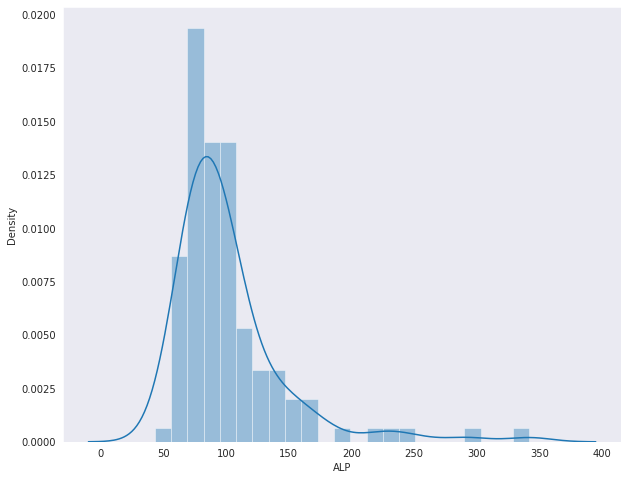

In [57]:
sns.set_style('dark')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['ALP'], kde=True)

<AxesSubplot:xlabel='AST', ylabel='Density'>

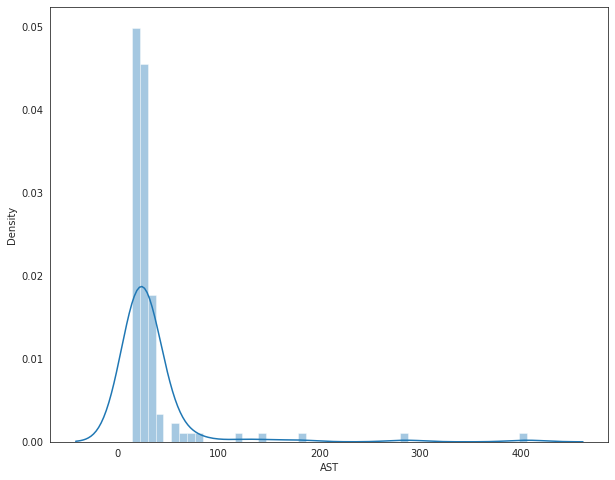

In [58]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['AST'], kde=True)

<AxesSubplot:xlabel='ALT', ylabel='Density'>

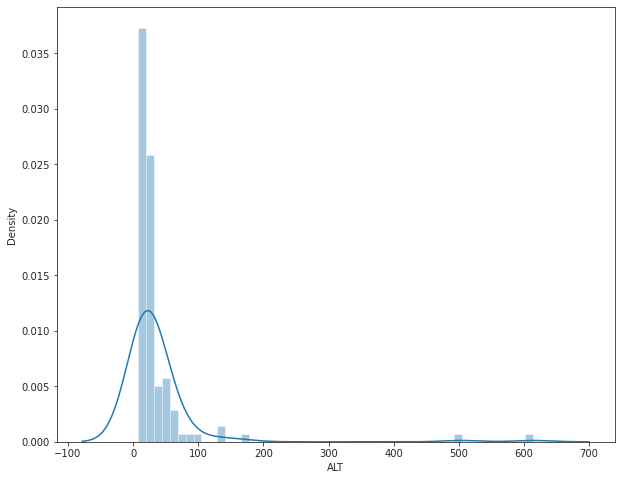

In [59]:
sns.set_style('ticks')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['ALT'], kde=True)

<AxesSubplot:xlabel='BILT', ylabel='Density'>

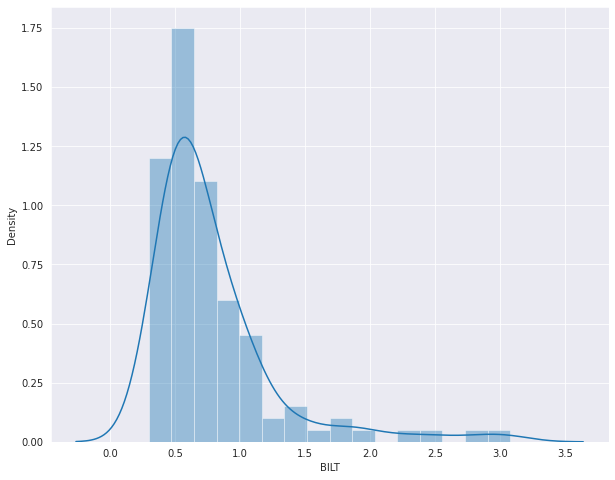

In [60]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['BILT'], kde=True)

<AxesSubplot:xlabel='GGT', ylabel='Density'>

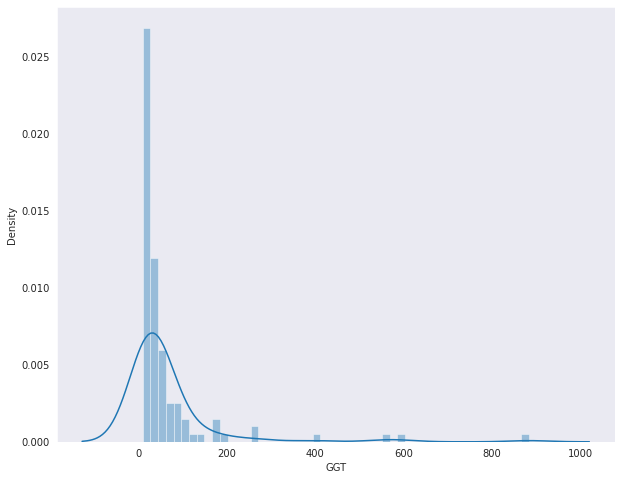

In [61]:
sns.set_style('dark')
plt.figure(figsize=(10, 8))
sns.distplot(a= df['GGT'], kde=True)

In [62]:
#df.drop(columns="Cedula")
df.to_csv("nov_clean.csv", index=False)